<a href="https://colab.research.google.com/github/Shashwat-Manglam-Jain/Netflix-Stock-Price-Predictor/blob/main/Netflix_Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the liabaries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [ ]:
df.shape

(5044, 7)

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df["Year"]=df['Date'].dt.year
df["Month"]=df['Date'].dt.month
df["Day"]=df['Date'].dt.day

df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28


In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5044 non-null   float64
 1   High       5044 non-null   float64
 2   Low        5044 non-null   float64
 3   Close      5044 non-null   float64
 4   Adj Close  5044 non-null   float64
 5   Volume     5044 non-null   int64  
 6   Year       5044 non-null   int32  
 7   Month      5044 non-null   int32  
 8   Day        5044 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 295.7 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03,5044.000000,5044.000000,5044.000000
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07,2011.905630,6.545797,15.737708
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07,5.798402,3.423809,8.758690
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05,2002.000000,1.000000,1.000000
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06,2007.000000,4.000000,8.000000
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07,2012.000000,7.000000,16.000000
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07,2017.000000,10.000000,23.000000
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08,2022.000000,12.000000,31.000000


##EDA- Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
corr =df.corr()

In [ ]:
corr

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Open,1.000000,0.999863,0.999853,0.999695,0.999695,-0.262560,0.814140,-0.004033,-0.003739
High,0.999863,1.000000,0.999815,0.999861,0.999861,-0.261281,0.814615,-0.004482,-0.003833
Low,0.999853,0.999815,1.000000,0.999856,0.999856,-0.264033,0.813706,-0.003523,-0.003572
Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Adj Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Volume,-0.262560,-0.261281,-0.264033,-0.262548,-0.262548,1.000000,-0.108797,-0.044664,0.032562
Year,0.814140,0.814615,0.813706,0.814257,0.814257,-0.108797,1.000000,-0.072108,-0.006204
Month,-0.004033,-0.004482,-0.003523,-0.004129,-0.004129,-0.044664,-0.072108,1.000000,-0.001500
Day,-0.003739,-0.003833,-0.003572,-0.003773,-0.003773,0.032562,-0.006204,-0.001500,1.000000


<Axes: >

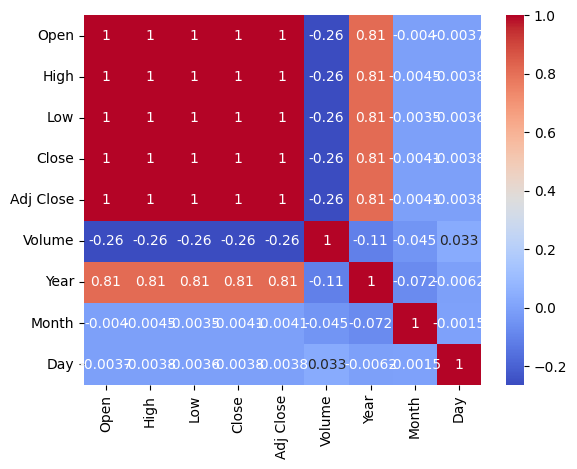

In [ ]:
sns.heatmap(corr,annot=True,cmap='coolwarm',cbar=True)

# data scatterness

<Axes: xlabel='Open', ylabel='Close'>

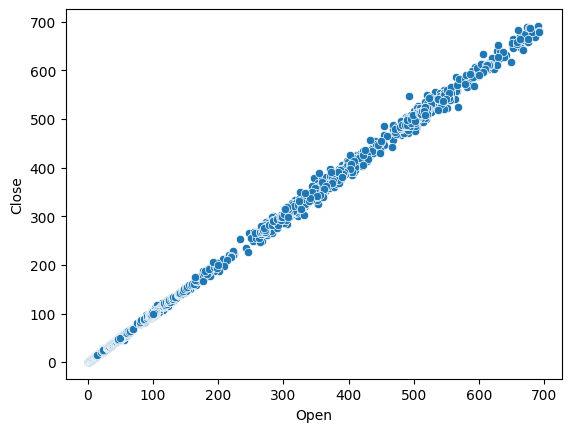

In [ ]:
sns.scatterplot(x=df['Open'],y=df['Close'])

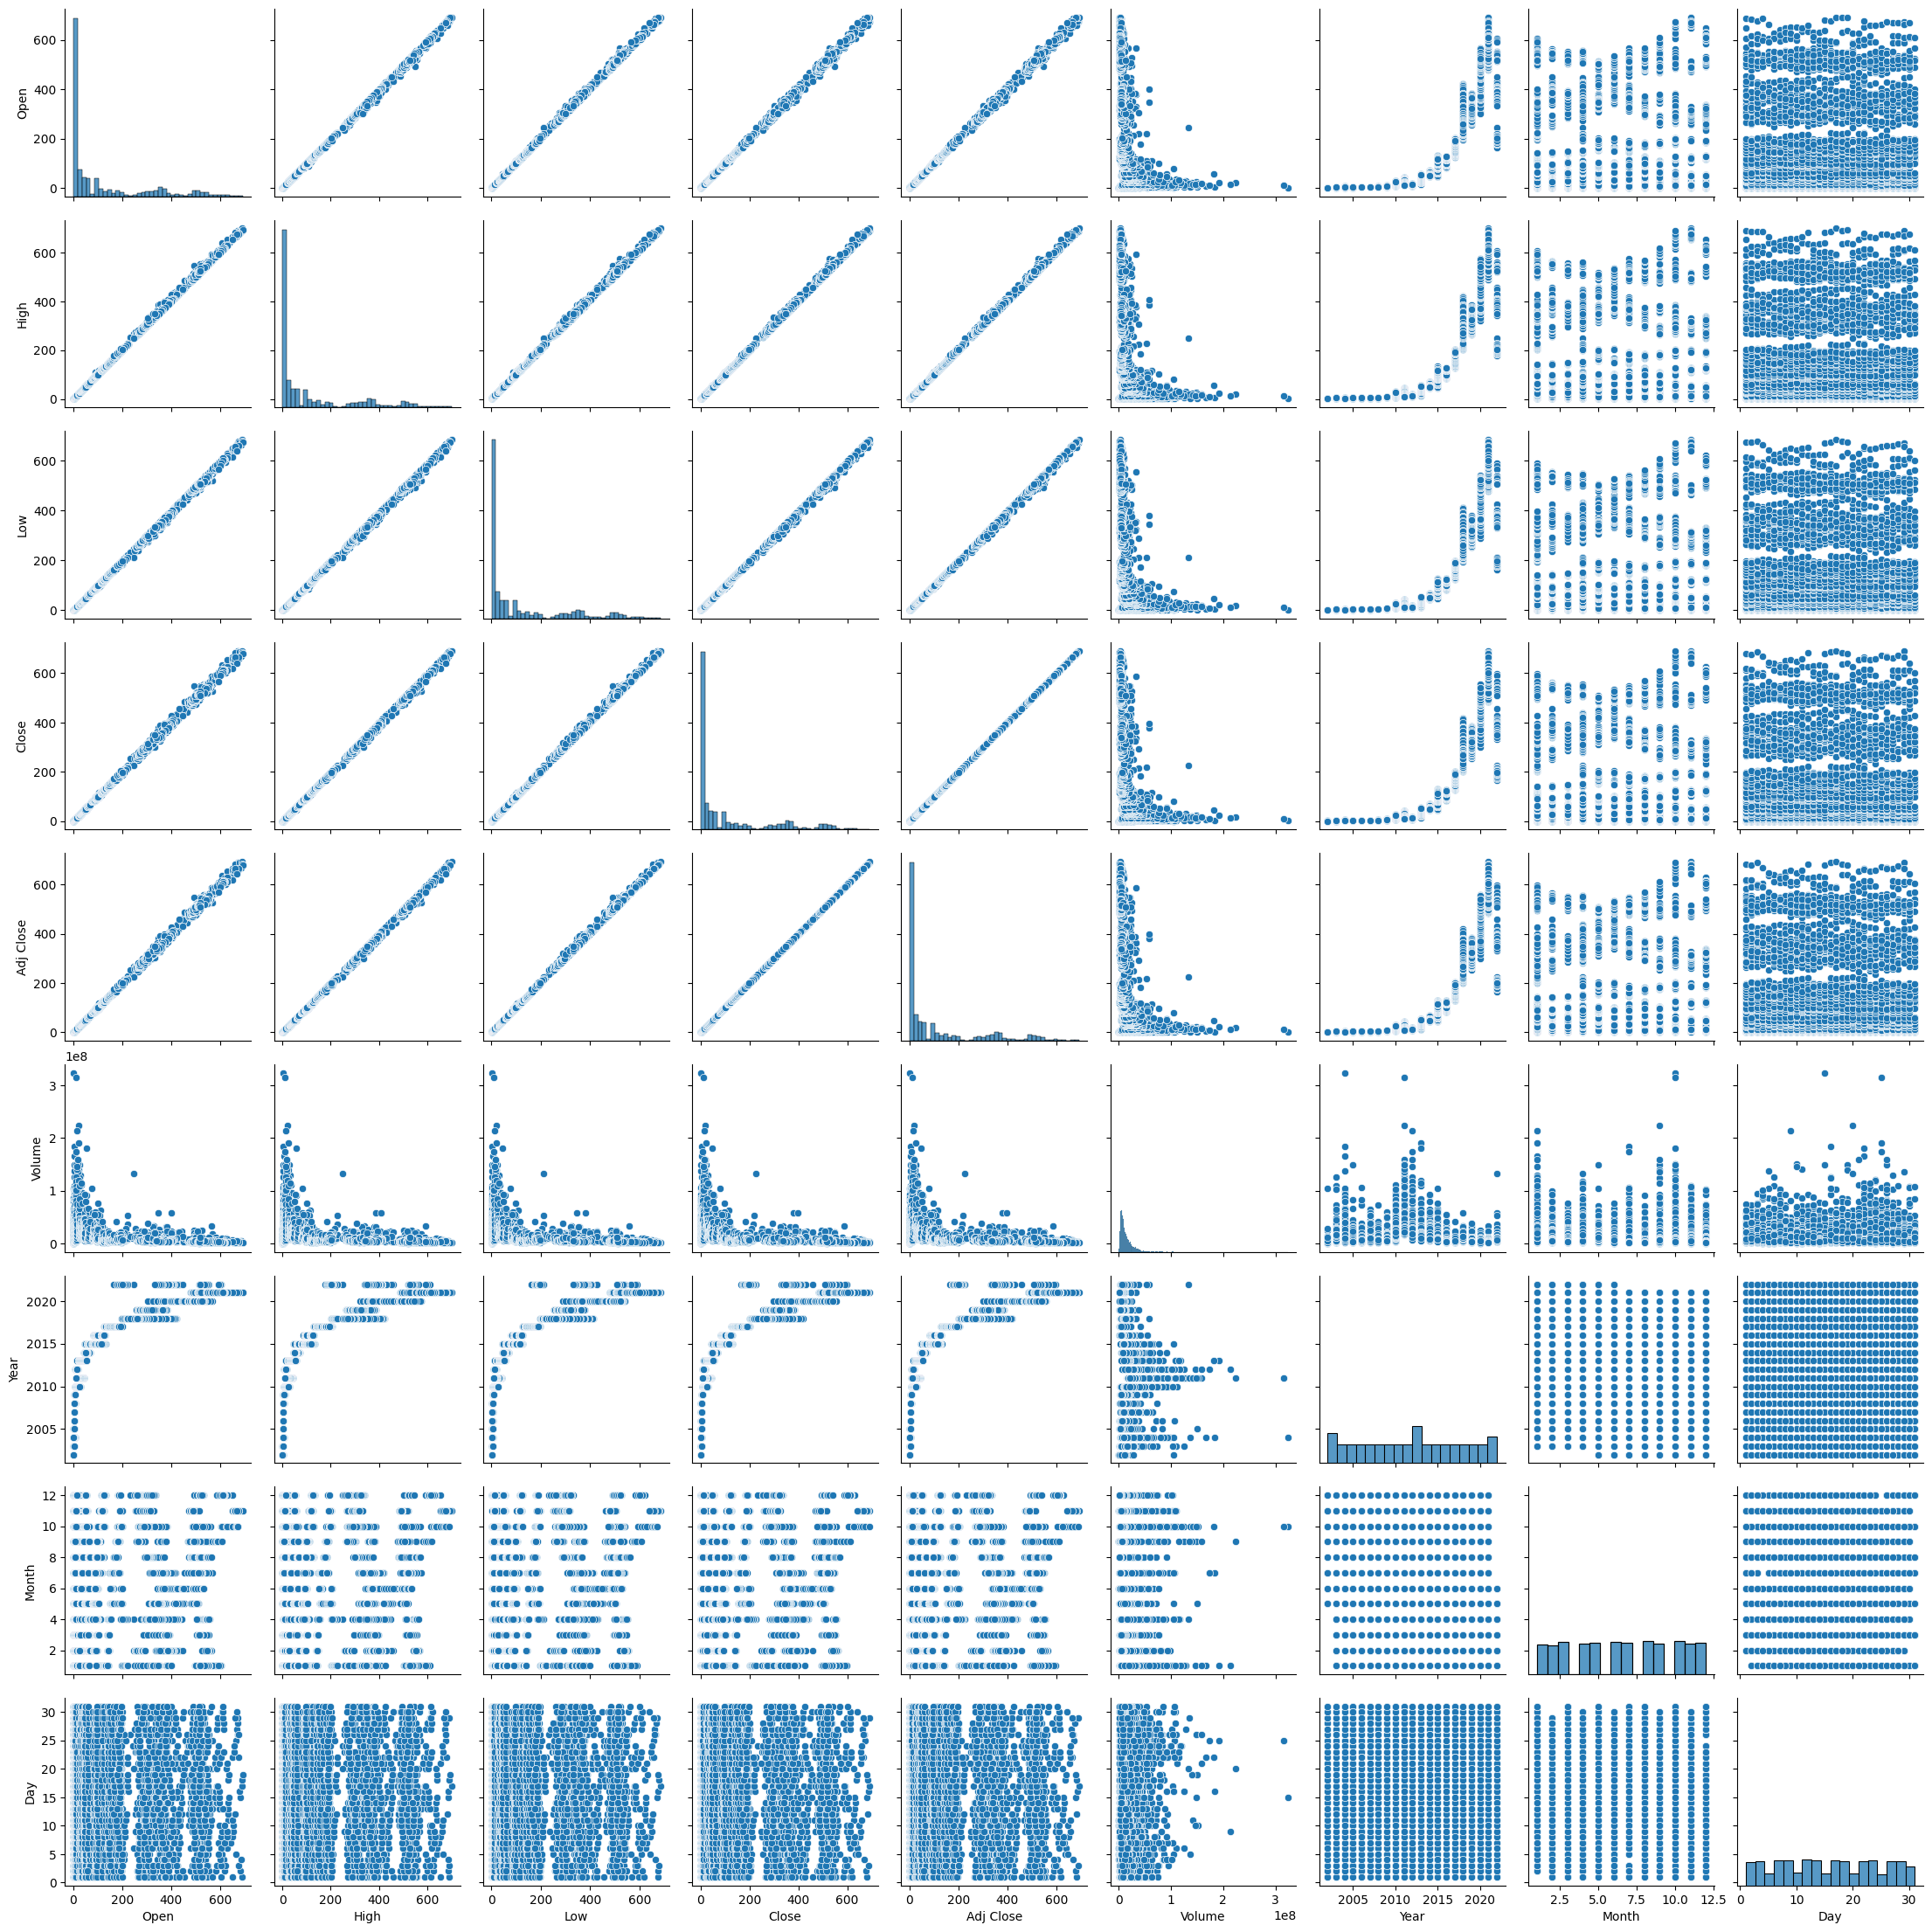

In [ ]:
sns.pairplot(df)

#data destribution

<ipython-input-143-0a938f74fdea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


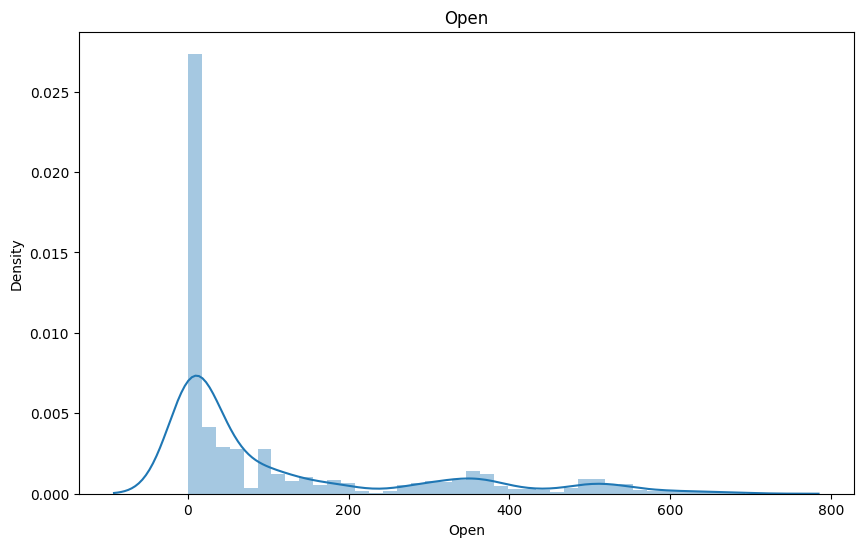

<ipython-input-143-0a938f74fdea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


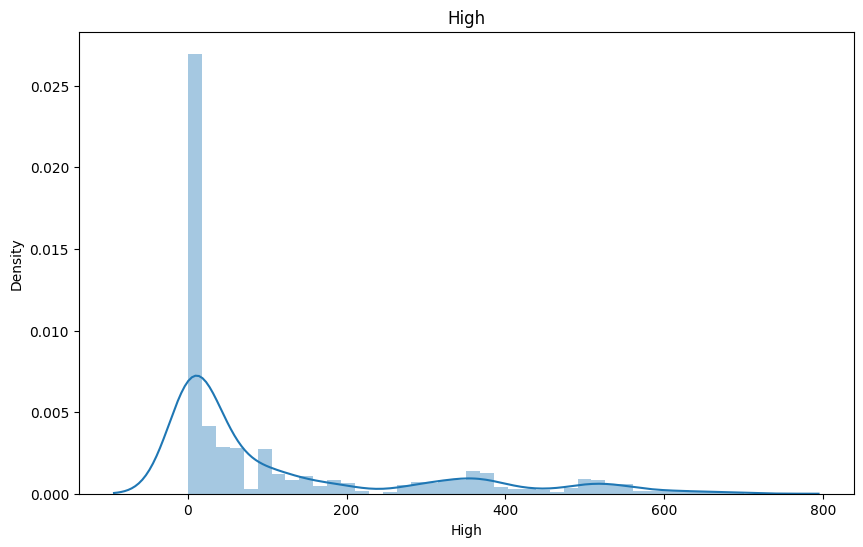

<ipython-input-143-0a938f74fdea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


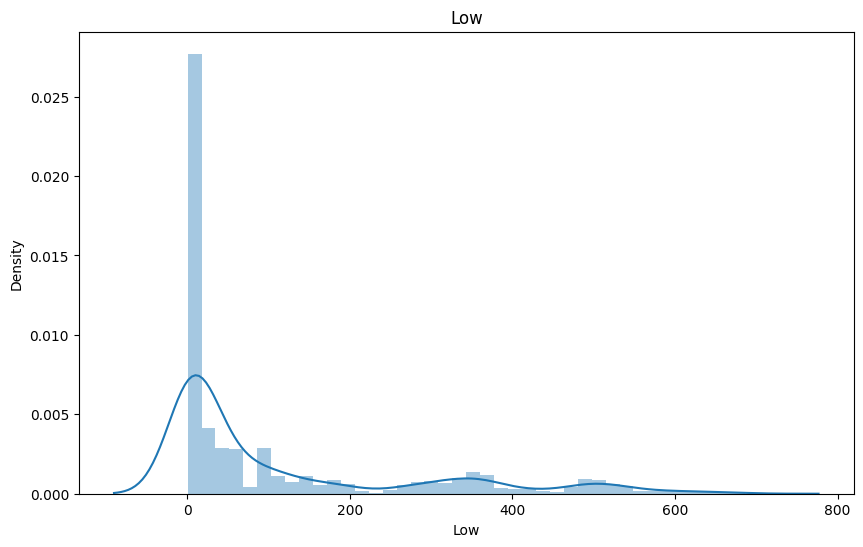

<ipython-input-143-0a938f74fdea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


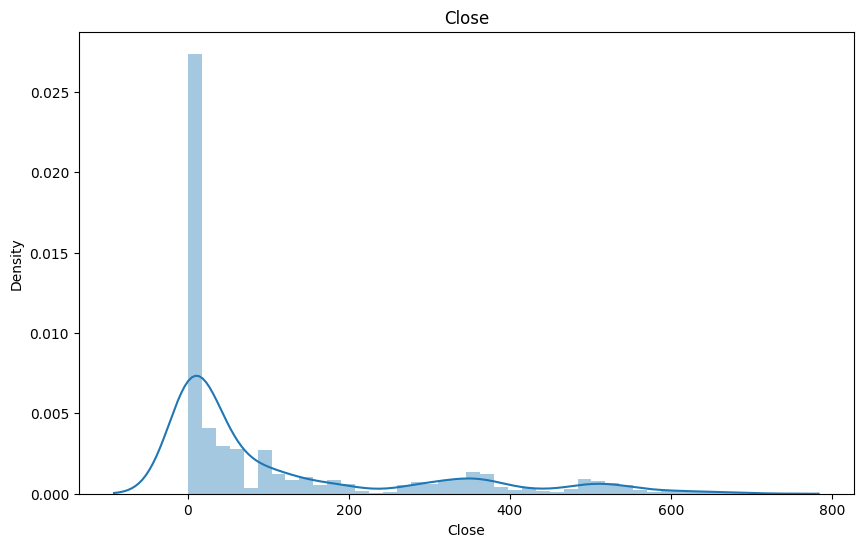

<ipython-input-143-0a938f74fdea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


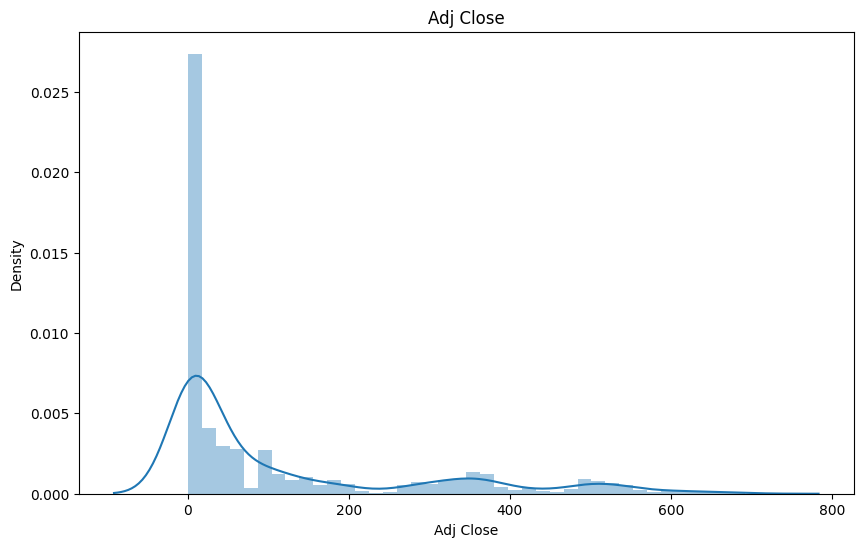

<ipython-input-143-0a938f74fdea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


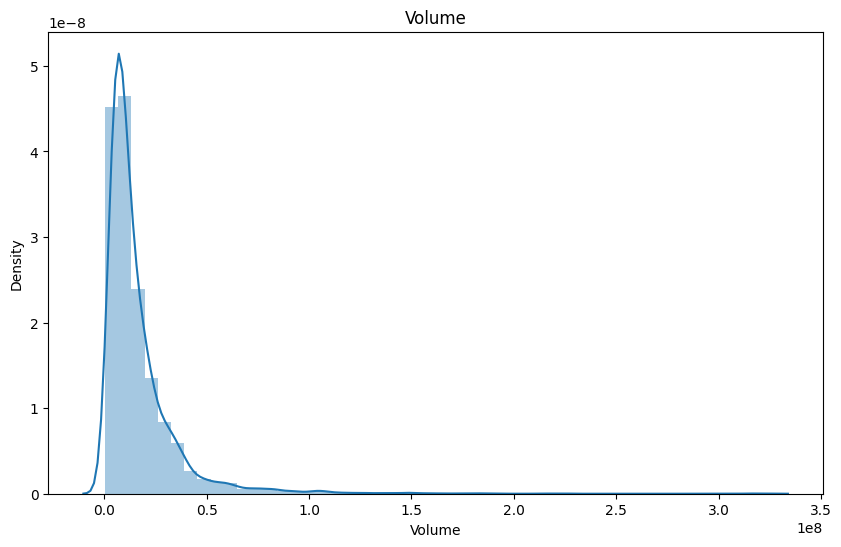

<ipython-input-143-0a938f74fdea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


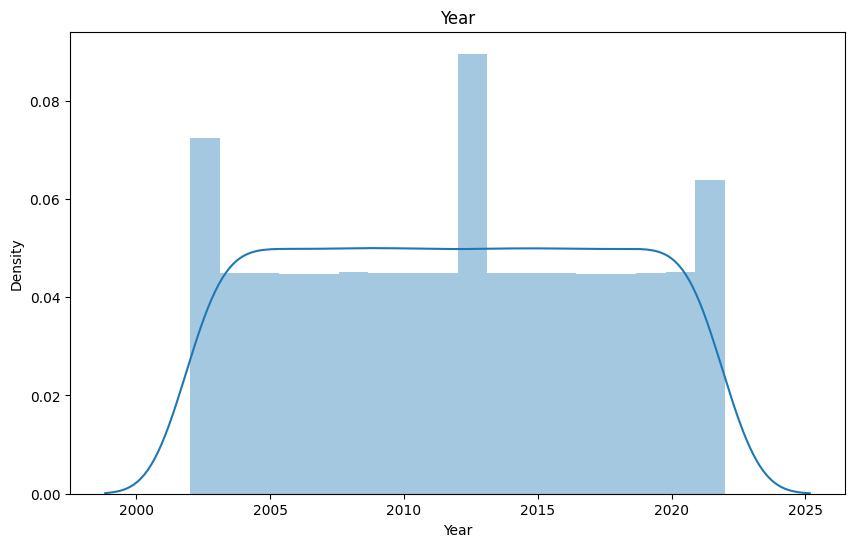

<ipython-input-143-0a938f74fdea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


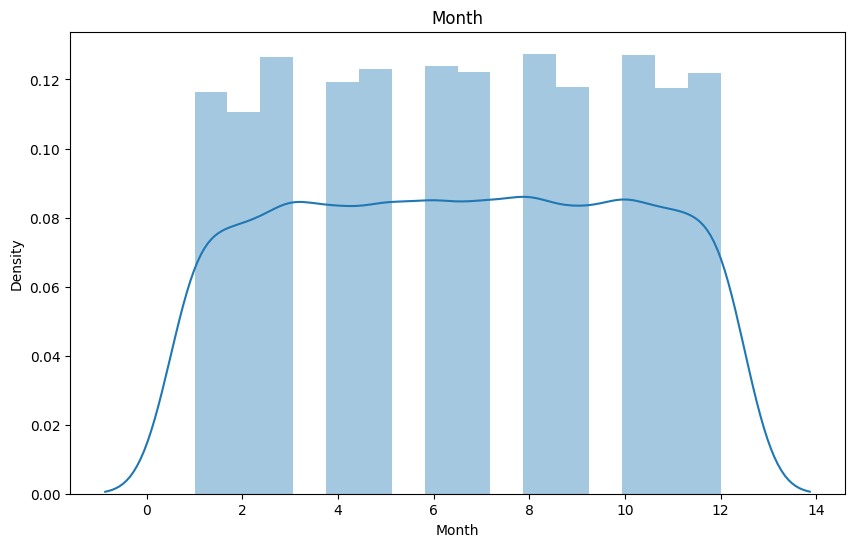

<ipython-input-143-0a938f74fdea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


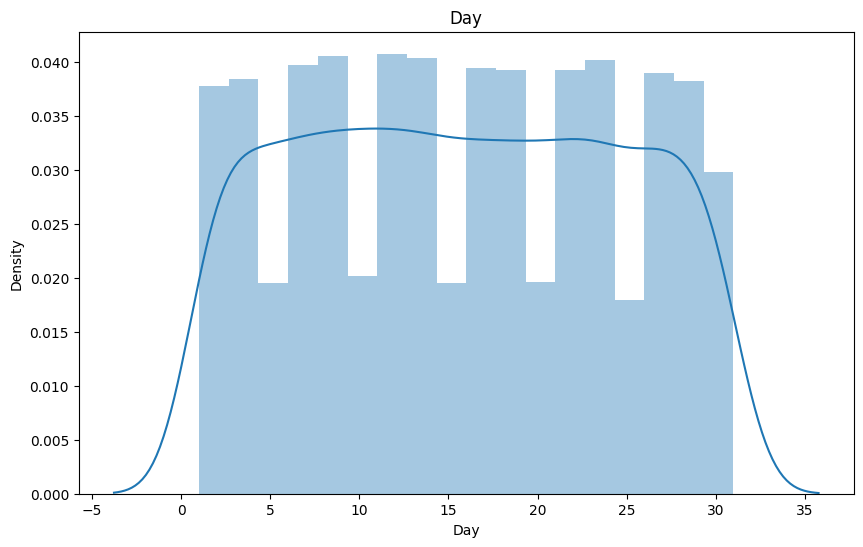

In [ ]:
for i in df.columns:
 plt.figure(figsize=(10,6))
 sns.distplot(df[i])
 plt.title(i)
 plt.show()

#Train Test Split

In [ ]:
X=df.drop('Close',axis=1)
y=df['Close']

In [ ]:
print(X.shape,y.shape,X,y)


(5044, 8) (5044,)             Open        High         Low   Adj Close     Volume  Year  Month  \
0       1.156429    1.242857    1.145714    1.196429  104790000  2002      5   
1       1.214286    1.225000    1.197143    1.210000   11104800  2002      5   
2       1.213571    1.232143    1.157143    1.157143    6609400  2002      5   
3       1.164286    1.164286    1.085714    1.103571    6757800  2002      5   
4       1.107857    1.107857    1.071429    1.071429   10154200  2002      5   
...          ...         ...         ...         ...        ...   ...    ...   
5039  193.190002  195.250000  190.369995  195.190002    8586000  2022      5   
5040  196.179993  199.949997  190.800003  197.440002   11398500  2022      5   
5041  198.699997  202.740005  191.660004  192.910004    8416200  2022      6   
5042  192.020004  205.470001  191.720001  205.089996    9623100  2022      6   
5043  200.139999  202.949997  198.050003  198.979996    7181700  2022      6   

      Day  
0      23

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 ,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(5044, 8) (4035, 8) (1009, 8)


# Normalizating Data Using StandarScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train[['Volume', 'Year', 'Month', 'Day']] = scaler.fit_transform(X_train[['Volume', 'Year', 'Month', 'Day']])
X_test[['Volume', 'Year', 'Month', 'Day']] = scaler.transform(X_test[['Volume', 'Year', 'Month', 'Day']])


#Model Selection

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(kernel='linear'),  # Linear Support Vector Regression
    SVR(kernel='rbf')      # RBF Kernel Support Vector Regression
]

In [ ]:
# Evaluate each model using cross-validation
results = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    results.append({
        'Model': type(model).__name__,
        'Mean_RMSE': rmse_scores.mean(),
        'Std_RMSE': rmse_scores.std(),
        'Object': model  # Store the model object itself
    })

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+04, tolerance: 9.053e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+04, tolerance: 8.893e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.433e+04, tolerance: 9.074e

Negative Mean Squared Error (MSE):

In scikit-learn, the cross_val_score function typically returns a score where higher values are better. However, for metrics like Mean Squared Error (MSE), lower values are better.
To align with this convention, scikit-learn provides an option to calculate the negative of the metric. By doing so, higher values of negative MSE correspond to better performance.
So, when you specify scoring='neg_mean_squared_error', scikit-learn calculates the negative of the MSE during cross-validation.
Square Root of Negative MSE:

The negative MSE values are not intuitive for interpretation. Therefore, to make them more interpretable, we take the square root.
The square root of MSE is the Root Mean Squared Error (RMSE), which is a more interpretable measure of error. It represents the standard deviation of the residuals (errors) between predicted and actual values.
By taking the square root of the negative MSE, we convert it back to positive values, resulting in the RMSE.

In [ ]:
# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results)
print(results_df)

                       Model     Mean_RMSE      Std_RMSE  \
0           LinearRegression  3.291835e-14  1.623002e-14   
1                      Ridge  1.670180e-04  2.139126e-05   
2                      Lasso  2.661626e+00  1.401639e-01   
3      DecisionTreeRegressor  7.403910e-01  1.150796e-01   
4      RandomForestRegressor  6.764161e-01  1.324741e-01   
5  GradientBoostingRegressor  1.092162e+00  1.044255e-01   
6                        SVR  4.402167e-02  2.194794e-02   
7                        SVR  2.922559e+01  4.816251e+00   

                        Object  
0           LinearRegression()  
1                      Ridge()  
2                      Lasso()  
3      DecisionTreeRegressor()  
4      RandomForestRegressor()  
5  GradientBoostingRegressor()  
6         SVR(kernel='linear')  
7                        SVR()  


In [ ]:
# Select the model with the lowest mean RMSE
best_model_row = results_df.loc[results_df['Mean_RMSE'].idxmin()]
best_model = best_model_row['Object']
print("Best Model:", best_model_row['Model'])

Best Model: LinearRegression


In [ ]:
# Train the best model on the full training data
best_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Test RMSE: 2.22592490838732e-14


#Prediction system

In [ ]:
def pred(Open, High, Low, Adj_Close, Volume, year, month, day):
    # Combine features into a numpy array
    features = np.array([[Open, High, Low, Adj_Close, Volume, year, month, day]])
    # Normalize Volume, Year, Month, and Day using the pre-fitted scaler
    features[:, 4:] = scaler.transform(features[:, 4:])
    # Predict using the best model
    prediction = best_model.predict(features)
    return prediction[0]

In [ ]:
Open = 1.156429
High = 1.242857
Low = 1.145714
Adj_Close = 1.196429
Volume = 104790000
year = 2002
month = 5
day = 23

res = pred(Open,High,Low,Adj_Close,Volume,year,month,day)

print(res)

1.1964290000000142


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
pickle.dump(best_model,open('netflix_model.pkl','wb'))